<a href="https://colab.research.google.com/github/Bruno-Messias/AirController/blob/Dev/Regressao_Teoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Regressão - Teoria</center>
___

## Conteúdo
1. [Relembrando](#recap) <br>
2. [Definição do Problema](#problem_def) <br>
3. [Análise inicial](#initial_analysis) <br>
4. [Separação de Treino e Teste](#split) <br>
5. [Modelagem](#modeling) <br>
6. [Avaliação do Modelo](#eval) <br>
[Saiba Mais](#digdeeper)

<a id="dsprecap"></a>
## Data Science Pipeline (DSP)
1. Definição do Problema / Definição do Escopo
2. Definição das Métricas de Sucesso
3. Definição dos Dados Necessários
4. Aquisição de Dados
5. Pré-processamento de Dados
6. Análise Exploratória de Dados (E.D.A.)
7. <i>Feature Engineering</i>
8. Construção e Avaliação do Modelo
9. Comunicação dos Resultados
10. Implantação
11. Monitoramento e Manutenção

**Essa aula tratará principalmente do passo 8, para os casos de modelos regressivos.**

<a id="recap"></a>
## 1. Relembrando

Olá! Na última aula nos exploramos os problemas de classificação. Já sabemos como construir modelos que indicam, por exemplo, se vai chover ou não amanhã, ou se o resultado de uma partida de futebol gaélico (ou futebol irlandês) será um empate, vitória ou derrota para um dos times.

<img src = http://image.vovworld.vn/w730/uploaded/vovworld/asfzyrvslys/2016_04_22/it%20had%20goals,%20it%20had%20fights,%20it%20had%20dubious%20decisions,%20it%20had%20end-to-end%20football%20and%20even%20had%20blanket%20defences%20at%20times.jpg width = 400>

Achando que já sabe resolver todos os problemas de <i>machine learning</i> já? Muita calma nessa hora! Imagine que você tem uma filha e quer prever com qual idade ela terá o primeiro filho. Esse não é um problema de classificação: a resposta para essa questão é um número e não uma classe. Então a previsão do seu modelo pode estar entre, digamos, 10 anos (torcemos que não) e 50 anos.

Em resumo, quando a pergunta deixa de ser _qual_ e passa a ser _quanto_, então você tem um problema de regressão na sua frente.

Mais uma vez, utilizaremos a biblioteca _open source_ do python sci-kit learn (**sklearn**).

<a id="problem_def"></a>
## 2. Definição do Problema

Imagine a seguinte situação hipotética (ou não): em uma tarde ensolarada do final dos anos 1970 você está andando com seu cachorro pelas ruas do centro de Boston, nos EUA. Seu cachorro para pra fazer aquilo que ele saiu pra fazer, e você, esperando ele terminar, avista uma bela casa de dois andares. Naturalmente, você pensa: _"Nossa, olha aquela casa! Com um jardim daquele tamanho, eu nem precisaria levar meu cachorro para passear. Quanto será que uma casa dessa custa?"_ Essa é uma pergunta pertinente, mas que demandaria conhecimento e experiência do mercado imobiliário para adivinhar o preço daquela casa nos anos 70.
</br>


<img src = https://4pfoten-on-tour.de/wp-content/uploads/2018/05/dog-3320058_1920.jpg width = 400>

Agora digamos que você é uma pessoa no século 21 e está aprendendo sobre _machine learning_ - parece familiar? - e, mais do que isso, você está pensando _"qual seria o lugar que eu viveria se eu estivesse nos anos 70 e tivesse que escolher um lugar que eu pudesse andar com meu cachorro todos os dias?"_ A resposta pra essa pergunta só pode ser... Boston, certo? Bom, pelo menos nessa situação hipotética é o que assumiremos. Então você abre o mapa, começa a olhar as casas e se pergunta _"será que eu conseguiria comprar essa casa na época?"_ É aí que você lembra das suas aulas de _machine learning_ e começa a fazer um modelo para prever o valor monetário da casa dos seus sonhos.

É isso que vamos fazer hoje! Vamos utilizar uma base de dados do _sklearn_ chamada **boston**, que contem informações do mercado imobiliário da cidade de mesmo nome nos anos 70, como o preço do imóvel, indicadores sociais, configurações do espaço do imóvel e assim por diante.

Então vamos tentar ensinar nossa máquina a prever quanto custa um imóvel baseado nessas informações que nós temos. E, dado que a pergunta agora é _quanto_ ao invés de _qual_, nosso problema é de regressão.

Pronto? Vamos **começar**!

In [ ]:
# Importando a base de dados
from sklearn import datasets
estate_df = datasets.load_boston()

X, y = estate_df.data, estate_df.target

print("X", X.shape)
print("y", y.shape)

X (506, 13)
y (506,)


Conseguimos ver que temos 13 variáveis (_features_) que descrevem 506 imóveis. Veremos a frente que essa razão de _observações_/_variáveis_ é apropriada.

As bases de dados (_datasets_) do ```scikit-learn``` são objetos da class Bunch, que contem os dados em si, mas também informações adicionais sobre eles. Esse tipo de informação é chamado de metadados (_metadata_), que significa "dados sobre os dados". Podemos entender essa classe como algo similar aos dicionários do python, com a vantagem de podermos acessar os atributos com um ponto (dataset.atributo ao invés de dataset\['atributo'\]). Assim como nos dicionários, podemos ver todas as informações no objeto Bunch usando ```print(dataset.keys())```.

No código abaixo pegamos a descrição dos dados que vamos usar na aula de hoje:

In [ ]:
# Imprimindo a descrição da base de dados
print(estate_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<a id="initial_analysis"></a>
## 3. Análise Inicial

Para começar, é importante lembrar que o _dataset_ utilizado nessa aula é adquirido através da biblioteca _scikit-learn_. A maioria dos _datasets_ do pacote, chamados de *toy datasets* (base de dados de brinquedo), são utilizados para usos educacionais e como comparativos. Dessa forma, eles normalmente **já estão com uma certa qualidade e passaram por alguns processos de pré-processamento**. É importante notar que em _datasets_ de problemas reais é preciso passar por todo os passos da metodologia antes da modelagem.


### 3.1. Classificação x Regressão
Para falar dos algoritmos de regressão, é importante começarmos discutindo as diferenças entre eles e as técnicas de classificação. ***A principal diferença está de fato na variável resposta. Na classificação ela é categorica (discreta), enquanto na regressão ela é um valor numérico (contínuo).***

Em machine learning, os algoritmos regressivos tentam estimar uma função (f) que mapeia as variáveis de entrada (x) a uma variável resposta (y) numérica, ou contínua. Nesse caso, y é um valor real que pode ser inteiro ou decimal. Por isso, os problemas nos quais se aplicam um modelo de regressão estão relacionados a quantidade ou tamanho.

No exemplo que usaremos aqui, nosso objetivo é prever o preço de um imóvel baseado em um conjunto de variáveis. Mais uma vez, nossa pergunta aqui é _quanto_ e não _qual_!!!

Com isso, dada a diferença da variável resposta, a forma que avaliamos a qualidade de um modelo regressivo é diferente do que fazemos para modelos classificatórios. Para os modelos de classificação podemos utilizar como métricas a área sob a curva ROC, a acurácia ou o Log-Loss, enquanto para os modelos de regressão costumamos utilizar o MSE (sigla em inglês para erro quadrático médio), RMSE (raiz do erro quadrático médio), R² (R-quadrado) ou R² ajustado.



### 3.2 Representatividade do domínio
Na última aula, foi falado do problema de desbalanceamento de classes para problemas de classificação, que é muito importante naquele caso. Nos problemas de regressão, temos um outro problema igualmente importante, a representatividade do domínio.
No *dataset* de Boston, por exemplo. os preços das casas vão de US\$ 5,000 a US\$ 50,000. Quando separamos os dados em treino e teste, é importante verificarmos que os preços na base de treino representam de forma justa os dados completos, para que tenhamos exemplos de treino em (quase) todo o domínio da variável resposta. É isso que chamamos de representatividade do domínio. Vamos ver a distribuição dos preços na nossa base!


<Figure size 432x288 with 0 Axes>

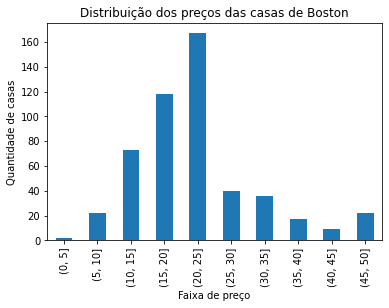

In [ ]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure()
df_target = pd.DataFrame(estate_df.target)
df_target.groupby(pd.cut(df_target[0], np.arange(0,51,5))).count().plot(kind='bar', legend=False)
plt.title('Distribuição dos preços das casas de Boston')
plt.ylabel('Quantidade de casas')
plt.xlabel('Faixa de preço')
plt.show()

Como pudemos ver, a distribuição de preços não é plana, então é boa prática garantir que os *datasets* de treino e teste têm distribuição similar.

### 3.3 Como converter um problema de regressão em um problema de classificação?

Por fim, mas não menos importante, vale mencionar que conseguimos transformar um problema de regressão em um de classificação em alguns casos. Por exemplo, a quantidade a ser prevista poderia ser transformada em grupos discretos. A própria visualização utilizada no gráfico acima já foi feita com barras que representam intervalos fixados, então a gente consegue analisá-los em um domínio discreto (olha a classificação aqui!). Isso normalmente é chamado de discretização e a variável resposta pssa a ser classificada com rótulos que tem uma relação de ordem. Essa abordagem pode ser bastante poderosa em alguns problemas reais.

<a id="split"></a>
## 4. Separação dos *datasets* de treino e teste

A teoria da quebra em treino, teste e validação foi tratado na última aula e é a mesma para os casos de regressão. É um dos conceitos mais importantes do nosso pipeline de modelagem. Caso não se recorde dos conceitos tratados nessa seção, volte na aula anterior.

### 4.1. Código Python

#### 4.1.1. Separação de treino e teste
Primeiramente separamos o conjunto de teste.

In [ ]:
# importando a função train_test_split
from sklearn.model_selection import train_test_split

# configurando a semente aleatória para reprodutibilidade dos resultados
# a mesma semente será utilizada em demais partes do código
seed = 10

# usando a função train_test_split para criar o dataset de teste
# random_state  é utilizado para a geração dos números aleatórios, por isso passamos a semente
# test_size define o tamanho do dataset de teste e pode ser um inteiro do número de observações ou a proporção delas
# stratify é utilizado para garantir que a distribuição dos dados seja parecida nos dados de treino e teste
X_training, X_test, y_training, y_test = train_test_split(X, y, random_state=seed, test_size=0.25) #, stratify=y)

print("Test set X", X_test.shape)
print("Test set y", y_test.shape)

Test set X (127, 13)
Test set y (127,)


#### 4.1.2. Separação de treino e validação
Então dividimos as obsevações resultantes do treino para separar novamente no conjunto de validação.

In [ ]:
# o mesmo do anterior, mas separando a partir da base de treino apenas
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, random_state=seed,
                                                  test_size=0.33) #, stratify=y_training)

print("Train set X", X_train.shape)
print("Train set y", y_train.shape)
print("Validation set X", X_val.shape)
print("Validation set y", y_val.shape)

Train set X (253, 13)
Train set y (253,)
Validation set X (126, 13)
Validation set y (126,)


Assim como na última aula, podemos usar a imagem abaixo como referência, então em cada uma das variáveis, temos:

- **X_test** e **y_test**: conjunto de teste (vermelho)
- **X_training** e **y_training**: conjunto auxiliar de treino (verde superior) para o método de holdout (com validação cruzada)
- **X_train** e **y_train**: conjunto de treino (verde inferior) para treino sem validação cruzada
- **X_val** e **y_val**: conjunto de validação (amarelo) para avaliar os modelos sem validação cruzada

<img src="https://cdn-images-1.medium.com/max/1200/1*4G__SV580CxFj78o9yUXuQ.png" alt="cv" style="width: 600px;"/>

<a id="eval"></a>
## 6. Avaliação dos modelos - Métricas

Já aprendemos como separar nossos *datasets* em treino, teste e validação. Agora, precisamos entender como escolhemos os melhores modelos. Assim como fizemos no modelo de classificação, vamos fazer isso através de métricas de erro, mas essas métricas são diferentes daquelas usadas nas aulas anteriores. Apresentamos a seguir as métricas dos modelos regressivos, com as siglas em inglês, como normalmente são utilizados:
* MAE (erro absoluto médio)
* MSE (erro quadrático médio)
* RMSE (raiz do erro quadrático médio)
* R² (R quadrado)

### 6.1 MAE (erro absoluto médio)

MAE é a média do valor absoluto da diferença entre o valor previsto e o valor real. O MAE é uma métrica linear, o que significa que cada diferença tem um peso igual na média. Por exemplo, a diferença entre 0 e 10 será o dobro de uma diferença entre 5 e 0. Porém, o mesmo não é verdade para o RMSE, que discutiremos em breve. Sua fórmula matemática é:

![Imgur](https://cdn-images-1.medium.com/max/800/1*8DXbECB9pnKxTpIvuVD-vg.png)

### 6.2 MSE (erro quadrático médio)

O erro qudrático médio (MSE) é como o MAE, mas elevamos as diferenças ao quadrado antes de somá-las ao invés que calcular o valor absoluto. Uma vez que as diferenças são elevadas ao quadrado, essa métrica penaliza mais os *outliers*. Sua fórmula matemática está a seguir:

![Imgur](https://cdn-images-1.medium.com/max/300/1*3wB5otkgKEiv9X6Gdd0r2Q@2x.png)


### 6.3 RMSE (raiz do erro quadrático médio)

Essa é uma das métricas mais utilizadas nos modelos de regressão. Como o MSE, essa métrica também penaliza os *outliers*. Entretanto, ele tem a vantagem de ter a mesma unidade da variável resposta, ao contrário do MSE, o que torna ele mais fácil de ser interpretado. Por exemplo, com o preço das casas em dólar, teríamos o RMSE também em dólar. A equação matemática está abaixo:

![Imgur](https://cdn-images-1.medium.com/max/1000/1*qz8jRMxmMEwNsFh0Cs5XfQ.png)

### 6.4 R² (R quadrado)

Uma dificuldade de utilizar o MSE ou RMSE é não ter uma indicação clara pelo valor da métrica. Se eu te disser que temos um MSE de 11,7 você diria que é bom ou ruim? Na verdade, é muito difícil dizer se nosso modelo é bom ou ruim apenas pelos valores das métricas de MSE ou RMSE, elas servem mais para comparação. Dessa forma, seria bom se tivessemos uma métrica base para fazer essa comparação.
O coeficiente de determinação, ou R² é uma métrica bastante relacionada ao RMSE, mas com a vantagem de não depender da escala dos valores previstos, o que significa que independentemente dos valores serem grandes ou pequenos, o R² sempre estará entre -∞ e 1.

Quando o R² for negativo, significa que o modelo é pior do que prever utilizando a média.

![Imgur](https://cdn-images-1.medium.com/max/300/1*iqUOveJbbKk7-DHcQ0ZOnA@2x.png)

O MSE do modelo é computado como mostramos anteriormente, enquanto o MSE de *baseline* é definido como:

![Imgur](https://cdn-images-1.medium.com/max/300/1*SZVKM6G8v8veQPqmO1c2Aw@2x.png)

com o y com a barra acima sendo a média do valor observado, ou real, yᵢ.

De forma mais simples, o MSE do *baseline* pode ser entendido como o MSE que o modelo mais simples obteria. O modelo mais simples para um problema regressivo seria sempre utilizar a média de todas as observações. Dessa forma, um valor para o R² próximo a 1 indica um modelo com erro próximo a 0, e um R² próximo a 0 indica um modelo próximo do *baseline*.

Em resumo, ***R² é a razão entre quão bom é o nosso modelo e quão bom é o modelo da média***.

Como vimos, há diferentes métricas para determinar o erro associado a uma previsão de um problema de regressão que variam bastante entre elas. A escolha entre as métricas vai depender do dado e do problema com o qual vocês está lidando. Se seu dado é sensível a *outliers*, é melhor usar MAE ou MAPE. Se *outliers* não é um problema pra você, você pode usar o MSE ou o RMSE. A seguir há algumas páginas para melhor entendimento desses conceitos, mas é importante lembrar que a escolha da métrica de erro é de extrema importância para a modelagem!

1. [Medium](https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4): Choosing the Right Metric for Evaluating Machine Learning Models
2. [Dataquest](https://www.dataquest.io/blog/understanding-regression-error-metrics/): Understanding Regression Error Metrics in Python

<a id="modeling"></a>
## 5. Modelagem

### 5.1. Random Forest

#### 5.1.1. Teoria
A floresta aleatória (em inglês, random forest) é um modelo baseado em diversas árvores de decisão. Mas não é apenas a média de diversas previsões feitas por árvores (que seriam *florestas*), pois esse método inclui dois conceitos chave que dão a parte **aleatória** do nome:

- Amostragem aleatória das observações do treino ao construir as árvores
- Seleção de um subconjunto aleatório das *features* ao quebrar os nós

A imagem a seguir mostrar uma interpretação visual dessas ideias:

![Imgur](https://c.mql5.com/2/33/image1__1.png)

Para mais detalhes sobre como as *random forests* funcionam, clique [aqui](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) para ler um artigo (em inglês) do Medium sobre o método e [aqui](https://www.youtube.com/watch?v=D_2LkhMJcfY) para assistir um pequeno vídeo sobre o assunto.

#### 5.1.2. Código em Python e Avaliação

Primeiro, precisamos instalar o pacote **ensemble** que contém as funções e objetos necessários para utilizarmos o *random forest*.

In [ ]:
import sys
!{sys.executable} -m pip install ensemble

  Created wheel for ensemble: filename=ensemble-0.0.dev1-cp37-none-any.whl size=4435 sha256=fb173be3321c51de1e8a122d350f4414420b4fac1c6a37b76f702d678b1089fe
  Stored in directory: /root/.cache/pip/wheels/40/0c/52/2fed70dec79c9412872fa27a2533dc8511feb96b3945143309
  Created wheel for pysut: filename=pysut-1.1-cp37-none-any.whl size=29074 sha256=935f2f9f77095d728a0e6bc4bd43354b37ae3606815e377a2e59f5d2897a4241
  Stored in directory: /root/.cache/pip/wheels/ed/f8/89/a198f4511cfcdd36335b15ba57215cf6d48444d751e8a615e6
  Created wheel for stats-arrays: filename=stats_arrays-0.6.5-cp37-none-any.whl size=26355 sha256=4f5a1677438e19893cda56df5ab0f9d28b3a6f9f471a52bc7ff6ce632d429d48
  Stored in directory: /root/.cache/pip/wheels/e2/36/22/f5e25d8b0aec350963a278c28046c7377b5de3365b5ed065c5
Successfully built ensemble pysut stats-arrays


Agora, vamos importar tudo o que precisamos, começando, é claro, pelo ```RandomForestRegressor```. Depois, vamos importar algumas métricas que utilizaremos para avaliar nosso modelo de  ```sklearn.metrics```.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)

Agora vamos treinar nosso primeiro modelo de *Random Forest*. Não está animado?

Isso se trata basicamente de: criar o objeto do modelo de *random forest* com seus hiperparâmetros. Já que estamos com um problema de regressão, vamos usar a classe ```RandomForestRegressor```. Você consegue ver os parâmetros disponíveis para criar esse objeto [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

Os parâmetros mais importantes que usaremos nessa aula são:
- **n_estimators \[padrão = 10\]**: O número de árvores de decisão criadas pelo modelo
- **max_features \[padrão = 'auto'\]**: O número de *features* a serem consideradas ao procurar pela melhor quebra. Se não for passado um valor, é utilizado o número total de *features* por padrão
- **max_depth \[padrão = None\]**: A profundidade máxima das árvores. Se não for passado, os nós são expandidos até que todas as folhas sejam puras ou menores que min_sample_split
- **min_samples_split  \[padrão = 2\]**: O número mínimo de observações necessários para se fazer uma quebra em um nó

Para começar, não vamos definir os hiperparâmetros, então o modelo será gerado com os valores padrões.

Score on training set: 0.979
Score on validation set: 0.788
Explained variance score: 0.788
Mean absolute error (MAE): 2.303
Mean squared error (MSE): 13.033
Mean squared log error (MSLE): 0.030
R² Score: 0.788


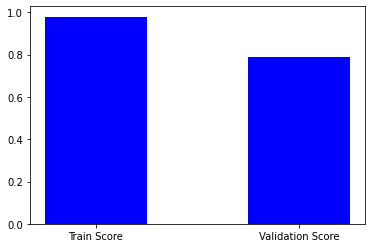

In [ ]:
##### RandomForest 1
# criando o objeto do modelo com RandomForestRegressor
rf_model_1 = RandomForestRegressor(random_state = seed)

# treinando o modelo com os dados de treino
rf_model_1.fit(X_train, y_train)

# prevendo com o modelo nos dados de validação
y_pred = rf_model_1.predict(X_val)

# calculando e imprimindo algumas métricas
print("Score on training set: {:.3f}".format(rf_model_1.score(X_train, y_train)))
print("Score on validation set: {:.3f}".format(rf_model_1.score(X_val, y_val)))
y = [rf_model_1.score(X_train, y_train), 
     rf_model_1.score(X_val, y_val)]
x = ["Train Score", "Validation Score"]
width = 1/2
plt.bar(x, y, width, color="blue") 
print("Explained variance score: {:.3f}".format(explained_variance_score(y_val, y_pred)))
print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_val, y_pred)))
print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_val, y_pred)))
print("Mean squared log error (MSLE): {:.3f}".format(mean_squared_log_error(y_val, y_pred)))
print("R² Score: {:.3f}".format(r2_score(y_val, y_pred)))

É isso! Bem fácil treinar um modelo de *Random Forest* para regressão, não é?

Como podemos ver, o modelo treinado tem um R² de 97,9% nos dados de treinos e 78,8% nos dados de validação, representando uma diferença de 19,1% entre eles.

É bem clara a diferença do R² nos dois dados, sendo bem maior nos dados de treino, indicando um problema clássico de *overfitting*. Para lidar com isso, você poderá rodar a célula abaixo alterando os parâmetros para tentar diminuir a diferênça do R² no treino e na validação. Tome cuidado para não reduzir demais as duas também, é melhor ter um modelo com *overfitting* que faz uma boa previsão do que um modelo que não tem previsões boas no treino nem na validação.

Tenha em mente as seguintes características de cada um dos hiperparâmetros:

- **n_estimators**: quanto maior o número de estimadores, mais e com menos viés será aprendido dos dados
- **max_features**: uma quantidade menor de *features* pode ajudar o modelo a remover correlações enviesadas
- **max_depth**: profundidades maiores aumentam a chance de *overfitting*, mas dão mais ganho de informação ao modelo
- **min_samples_split**: um número mínimo de observações maior pode reduzir o *overfitting*

Todos os hiperparâmetros estão inicialmente nos seus valores padrão.

Rode a célula abaixo e clique em **Run Interact** para testar quantas vezes você quiser!

In [ ]:
##### Random Forest 2

from IPython.display import display
from ipywidgets import interact_manual
import ipywidgets as widgets

def teste_treino(nEstimators, maxFeatures, maxDepth, minSamplesSplit):
    
    # criando o objeto do modelo com RandomForestRegressor
    rf_model_2 = RandomForestRegressor(n_estimators = nEstimators,
                                    max_features = maxFeatures, 
                                    max_depth = maxDepth, 
                                    min_samples_split = minSamplesSplit,
                                    random_state = seed)

    # treinando o modelo com os dados de treino
    rf_model_2.fit(X_train, y_train)

    # prevendo com o modelo nos dados de validação
    y_pred = rf_model_2.predict(X_val)

    # calculando e imprimindo algumas métricas
    
    print("Score on training set: {:.3f}".format(rf_model_2.score(X_train, y_train)))
    print("Score on validation set: {:.3f}".format(rf_model_2.score(X_val, y_val)))
    y = [rf_model_2.score(X_train, y_train), 
         rf_model_2.score(X_val, y_val)]
    x = ["Train Score", "Test Score"]
    width = 1/2
    plt.bar(x, y, width, color="blue")  
    print("Explained variance score: {:.3f}".format(explained_variance_score(y_val, y_pred)))
    print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_val, y_pred)))
    print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_val, y_pred)))
    print("Mean squared log error (MSLE): {:.3f}".format(mean_squared_log_error(y_val, y_pred)))
    print("R² Score: {:.3f}".format(r2_score(y_val, y_pred)))
    
# essas são as linhas de código para criar os seletores
_ = interact_manual(teste_treino, 
                    nEstimators =     widgets.IntSlider(min = 5, max = 1000, step = 1, value = 100),
                    maxFeatures =     widgets.IntSlider(min = 2, max = 13, step = 1, value = 13),
                    maxDepth =        widgets.IntSlider(min = 2, max = 100, step = 1, value = 50),
                    minSamplesSplit = widgets.IntSlider(min = 2, max = 30, step = 1, value = 2))

interactive(children=(IntSlider(value=100, description='nEstimators', max=1000, min=5), IntSlider(value=13, de…

É interessante notar que diminuir o número de *features* aumenta o R² nos dados de validação. Isso ocorre pelo fato de que, com menos *features* de cada vez em uma árvore, o modelo pode observar comportamentos diferentes, o que reduz o *overfitting*.

Agora vamos usar a validação cruzada com a *random forest*. A principal diferença em relação ao que fizemos antes é que vamos usar a função ```GridSearchCV``` que serve para *grid search* mas também para a validação cruzada. No caso, não utilizaremos o *grid*.

Average Score on train set: 0.978 +/- 0.002
Average Score on validation set: 0.835 +/- 0.067


<BarContainer object of 2 artists>

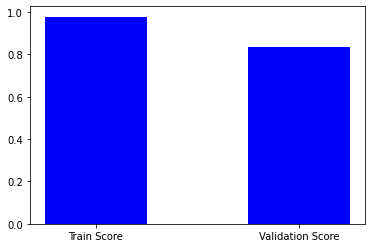

In [ ]:
# Random Forest com validação cruzada

# importando a função de grid search do sklearn
from sklearn.model_selection import GridSearchCV
import pandas as pd

# definindo os valores possíveis dos parâmetros a serem testados
params = {}

# criando o objeto do modelo com RandomForestRegressor
rf_model_cv = RandomForestRegressor(random_state = seed)

# criando o objeto do grid search com GridSearchCV
grid_search = GridSearchCV(rf_model_cv, param_grid = params, return_train_score=True) # valor padrão para quebras é 3

# treinando o modelo com o grid search
grid_search.fit(X_training, y_training)

# pegando os resultados da validação cruzada (cv_results)
cv_results = pd.DataFrame(grid_search.cv_results_)

# imprimindo o score médio nas bases de treino
print("Average Score on train set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
# imprimindo o score médio nas bases de validação
print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_test_score.values[0]))

y = [cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0], 
     cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0]]
x = ["Train Score", "Validation Score"]
width = 1/2
plt.bar(x, y, width, color="blue")  

Como podemos ver, utilizamos os mesmos parâmetros padrões que haviamos usado no primeiro modelo de *random forest*, mas o R² de validação foi maior. Isso ocorreu devido à validação cruzada.

Agora, vamos fazer o *grid search*. Essa técnica consiste em definir um conjunto de valores que determinado hiperparâmetro pode ter e treinar um modelo para cada combinação desses hiperparâmetros, e então selecionar a combinação com o melhor resultado.

Para fazer isso, vamos definir um dicionário com os valores dos hiperparâmetros a serem testados e usar ```GridSearchCV```para treinar todos os modelos, passando os valores possíveis, a métrica de avaliação e as quebras de validação cruzada. Assim, pegaremos o atributo ```best_params_```para treinar o modelo final.

Além disso, dessa vez faremos o gráfico de importância de variáveis para o melhor modelo. Esse gráfico mostra quais foram as variáveis mais importantes para o modelo.

Atenção: isso pode levar algum tempo.


 Best hyperparameters:
{'max_depth': 50, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 100}
Average Score on train set: 0.980 +/- 0.002
Average Score on validation set: 0.855 +/- 0.065


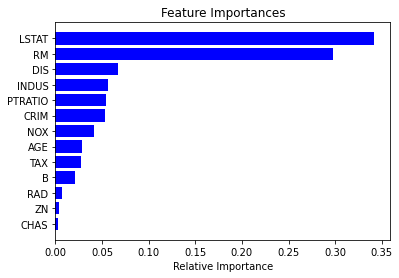

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Random Forest com validação cruzada e Grid Search

# definindo os valores possíveis dos parâmetros a serem testados
params = {'n_estimators': [5, 50, 100, 500],
          'max_features': [2, 5, 9, 13],
          'max_depth': [2, 5, 10, 50],
          'min_samples_split': [2, 8, 15, 30],}

# criando o objeto do modelo com RandomForestRegressor
rf_model_cv_gs = RandomForestRegressor(random_state = seed)

# criando o objeto do grid search com GridSearchCV
grid_search = GridSearchCV(rf_model_cv_gs, param_grid=params, return_train_score=True) # valor padrão para quebras é 3

# treinando o modelo com o grid search
grid_search.fit(X_training, y_training)

# imprimindo a melhor combinação de hiperparâmetros
print('\n Best hyperparameters:')
print(grid_search.best_params_)

# pegando os resultados da validação cruzada (cv_results)
cv_results = pd.DataFrame(grid_search.cv_results_)

# imprimindo o score médio nas bases de treino
print("Average Score on train set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
# imprimindo o score médio nas bases de validação
print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])) 

# configurando o modelo com a melhor combinação de hiperparâmetros
rf_model_cv_gs.set_params(n_estimators = grid_search.best_params_['n_estimators'],
                           max_features = grid_search.best_params_['max_features'],
                           max_depth = grid_search.best_params_['max_depth'],
                           min_samples_split = grid_search.best_params_['min_samples_split'])

# treinando um modelo com a melhor combinação de hiperparâmetros
rf_model_cv_gs.fit(X_training, y_training)

features = estate_df['feature_names']
importances = rf_model_cv_gs.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Podemos ver que usando o *Grid Search* os melhores parâmetros selecionados foram ```max_depth```de 50, ```max_features```de 5 e um número de estimadores de 100. O R² na base de validação subiu 0,02, ficando maior que nas nossas tentativas anteriores.

As variáveis mais importantes foram **LSTAT** e **RM**, que são o percentual de baixa renda na população e a média de quartos por habitação. Será que esses resultados fazem sentido?

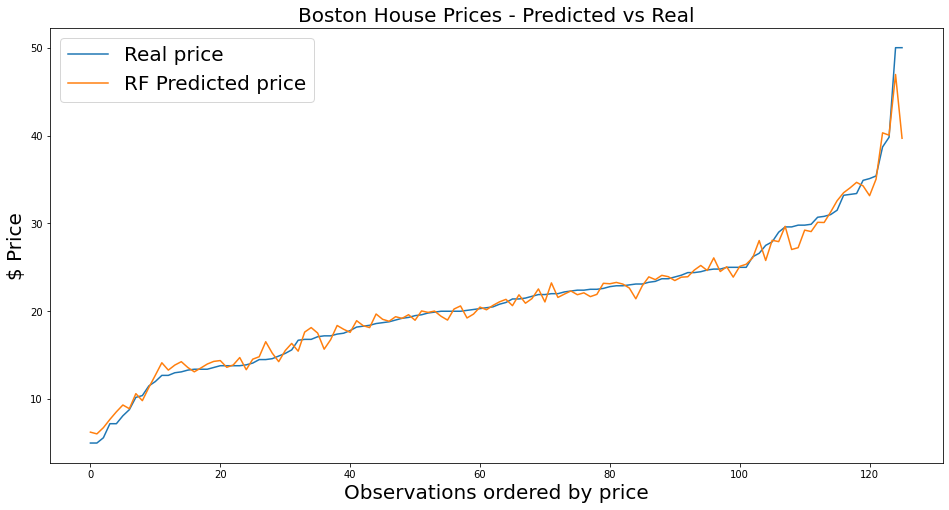

In [ ]:
# Desenhando o gráfico de valores previstos por valores reais
y_pred = rf_model_cv_gs.predict(X_val)
plt.figure(figsize=(16,8))
plt.title('Boston House Prices - Predicted vs Real',fontsize=20)
df = pd.DataFrame({'real':y_val,'RF':rf_model_cv_gs.predict(X_val)})
df.sort_values(by=['real'],ascending=True,inplace=True)
df = df.reset_index(drop=True)
plt.plot(df)
plt.legend(['Real price','RF Predicted price'],fontsize=20)
plt.ylabel('$ Price',fontsize=20)
plt.xlabel('Observations ordered by price',fontsize=20)
plt.show()

### 5.2. Light GBM

#### 5.2.1. Teoria
*Light GBM*, ou *Light Gradient Boosting Machine*, é um modelo de *ensemble*, como o *Extreme Gradient Boosting* presente na aula de classificação. A principal diferença entre o *Light GBM* e a maioria dos outros métodos de *boosting* é que ele usa um mecanismo diferente para a criação das árvores, que é mais rápido.

A maioria dos métodos de *boosting* funcionam da seguinte forma:

<img src = https://cdn-images-1.medium.com/max/800/1*whSa8rY4sgFQj1rEcWr8Ag.png width=600>

Enquanto o *Light GMB* funciona mais parecido com essa forma:

<img src = https://cdn-images-1.medium.com/max/1600/1*AZsSoXb8lc5N6mnhqX5JCg.png width=600>

Então podemos dizer que o *Light GBM* cria suas árvores **verticalmente**, enquanto outros algoritmos as criam **horizontalmente**. Em outras palavras, o *Light GBM* cresce suas árvores por folha, enquanto os demais crescem suas árvores por níveis. Assim, ele decide a quebra a ser feita na árvore pela folha que terá o maior ganho de informação.

Para mais detalhes de como o *Light GBM* funciona, veja [aqui](https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc) para um artigo do Medium e [aqui](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) para um artigo do Towards Data Science que compara diferentes algoritmos de *boosting*.

Além disso, [esse vídeo](https://www.youtube.com/watch?v=5CWwwtEM2TA) (a partir dos 10 minutos) explica um pouco mais a teoria por trás do *Light GBM*.

Adicionalmente, veja [essa página](https://lightgbm.readthedocs.io/en/latest/Experiments.html) que mostra alguns experimentos comparando o *XGBoost* e o *LightGBM* em termos de velocidade, acurácia e uso de memória. Os resultados são surpreendentes!

#### 5.2.2. Código em Python e Avaliação

A primeira coisa que precisamos fazer é instalar o pacote do Light GBM.

In [ ]:
import sys
!{sys.executable} -m pip install lightgbm

Agora importamos tudo o que precisamos. O mais importante é o ```Light GBM```, que chamaremos de **lgb**. Seria necessário também importar as métricas de avaliação dos modelos, mas já fizemos isso no caso do *random forest*.

In [ ]:
import lightgbm as lgb

Agora vamos treinar nosso primeiro modelo de *Light GBM*. Podemos começar?

Esse passo é bem parecido com o do *random forest*. Basicamente, é: criar o objeto do modelo de random forest com seus hiperparâmetros. Já que estamos com um problema de regressão, vamos usar a classe ```LGBMRegressor```. Você consegue ver os parâmetros disponíveis para criar esse objeto [aqui](https://lightgbm.readthedocs.io/en/latest/Parameters.html). Já que existem centenas de parâmetros para o *Light GBM*, há uma lista das implicações da maioria dos parâmetros [aqui](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html).

Os principais parâmetros que vamos usar nessa aula são:
- **task \[padrão = train\]**: use 'train' para treinar o modelo e 'predict' para aplicá-lo em uma nova base
- **objective \[padrão = regression\]**: define o tipo de problema e a função objetivo a ser utilizada
- **num_leaves \[padrão = 31\]**: número máximo de folhas em uma árvore
- **min_data_in_leaf \[padrão = 20\]**: quantidade mínima de dados em cada folha. Pode ser utilizado para lidar com o *over-fitting*, já que caso haja pouco dado em uma folha, as chances daquele comportamento só existir na base de treino são maiores
- **max_depth \[padrão = -1\]**: < 0 significa sem limite. Limita a profundidade máxima do modelo. Isso é útil para lidar com o *over-fitting* quando o dado é pequeno. A árvore continua sendo criada por folhas
- **max_bin \[padrão = 255\]**: número máximo de classes em que os valores das *features* serão agrupados. Um número pequeno de classes pode reduzir a acurácia de treino, mas lidar melhor com o *over-fitting*
- **min_gain_to_split \[padrão = 0.0\]**: o ganho de informação mínimo para fazer uma quebra na árvore
- **learning_rate \[padrão = 0.1\]**: taxa de aprendizagem, quanto menor, melhor para a acurácia
- **num_iterations \[padrão = 100\]**: número de iterações do *boosting*, quanto maior, maior as chances de convergencia
- **metric \[padrão = "", changes according to objective\]**: define a métrica de avaliação do treino

Como feito com o *random forest*, iniciaremos com os hiperparâmetros padrões no nosso primeiro modelo.

Score on training set: 0.966
Score on validation set: 0.731
Explained variance score: 0.732
Mean absolute error (MAE): 2.698
Mean squared error (MSE): 16.521
Mean squared log error (MSLE): 0.039
R² Score: 0.731


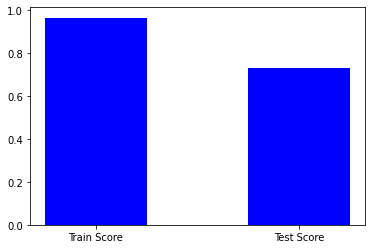

In [ ]:
##### LightGBM 1
# criando o objeto do modelo com LGBMRegressor
lgb_model_1 = lgb.LGBMRegressor(random_state = seed)

# treinando o modelo com os dados de treino
lgb_model_1.fit(X_train, y_train)

# prevendo com o modelo nos dados de validação
y_pred = lgb_model_1.predict(X_val)

# calculando e imprimindo algumas métricas
print("Score on training set: {:.3f}".format(lgb_model_1.score(X_train, y_train)))
print("Score on validation set: {:.3f}".format(lgb_model_1.score(X_val, y_val)))
y = [lgb_model_1.score(X_train, y_train), 
     lgb_model_1.score(X_val, y_val)]
x = ["Train Score", "Test Score"]
width = 1/2
plt.bar(x, y, width, color="blue") 
print("Explained variance score: {:.3f}".format(explained_variance_score(y_val, y_pred)))
print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_val, y_pred)))
print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_val, y_pred)))
print("Mean squared log error (MSLE): {:.3f}".format(mean_squared_log_error(y_val, y_pred)))
print("R² Score: {:.3f}".format(r2_score(y_val, y_pred)))

Como podemos ver, o modelo treinado tem um R² de 96,6% nos dados de treinos e 73,1% nos dados de validação, representando uma diferença de 23,5% entre eles.

Mais uma vez obtivemos R²s bem diferentes nos dados de treino e validação com os hiperparâmetros padrões, indicando um *over-fitting*. Então vamos mexer um pouco com eles para tentar melhorar isso.

Relembrando algumas características dos hiperparâmetros:

- **max_depth**: valores maiores vai deixar as árvores mais profundas, tendo mais folhas e, consequentemente, com mais chance de *over-fitting*
- **learning_rate**: a taxa na qual o modelo vai aprender novas informações a cada iteração. Valores menores fazem o modelo ser mais demorado, mas melhor. Valores maiores trará mais ganho de informação mais rapidamente, mas com mais chance de *over-fitting*
- **num_leaves**: quanto maior esse número, mais o modelo tentará aprender sobre os dados de treino. Tentar aprender demais poderá causar *over-fitting*. Adicionalmente, quanto menor o *learning_rate*, maior deve ser o *num_leaves* para o mesmo grau de aprendizagem
- **min_data_in_leaf**: aumentar esse número vai restringir mais a quebra das folhas
- **min_gain_to_split**: similar à métrica acima mas calculado pelo ganho de informação

Mais uma vez, todos os parâmetros estão inicialmente nos seus valores padrão, use o botão **Run Interact** para testar quantas vezes quiser!

In [ ]:
##### LightGBM 2

from IPython.display import display
from ipywidgets import interact_manual, IntSlider, FloatSlider
def teste_treino(maxDepth, learningRate, numIterations, numLeaves, minDataInLeaf, minGainToSplit):
    
    # criando o objeto do modelo com LGBMRegressor
    lgb_model_2 = lgb.LGBMRegressor(max_depth = maxDepth,
                                    learning_rate = learningRate, 
                                    num_iterations = numIterations, 
                                    num_leaves = numLeaves,
                                    min_data_in_leaf = minDataInLeaf,
                                    min_gain_to_split = minGainToSplit,
                                    random_state = seed)

    # treinando o modelo com os dados de treino
    lgb_model_2.fit(X_train, y_train)

    # prevendo com o modelo nos dados de validação
    y_pred = lgb_model_2.predict(X_val)

    # calculando e imprimindo algumas métricas
    
    print("Score on training set: {:.3f}".format(lgb_model_2.score(X_train, y_train)))
    print("Score on validation set: {:.3f}".format(lgb_model_2.score(X_val, y_val)))
    y = [lgb_model_2.score(X_train, y_train), 
         lgb_model_2.score(X_val, y_val)]
    x = ["Train Score", "Test Score"]
    width = 1/2
    plt.bar(x, y, width, color="blue")  
    print("Explained variance score: {:.3f}".format(explained_variance_score(y_val, y_pred)))
    print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_val, y_pred)))
    print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_val, y_pred)))
    print("Mean squared log error (MSLE): {:.3f}".format(mean_squared_log_error(y_val, y_pred)))
    print("R² Score: {:.3f}".format(r2_score(y_val, y_pred)))
    
# essas são as linhas de código para criar os seletores
_ = interact_manual(teste_treino, 
             maxDepth =       IntSlider(min = 2, max = 50, step = 1, value = 20),
             learningRate =   FloatSlider(min = 0.001, max = 0.3, step = 0.001, value = 0.1),
             numIterations =  IntSlider(min = 20, max = 600, step = 20, value = 100),
             numLeaves =      IntSlider(min = 20, max = 300, step = 20, value = 100),
             minDataInLeaf =  IntSlider(min = 2, max = 50, step = 1, value = 20),
             minGainToSplit = FloatSlider(min =0., max = 30, step = 1., value = 0.0))

interactive(children=(IntSlider(value=20, description='maxDepth', max=50, min=2), FloatSlider(value=0.1, descr…

Tente abaixar o *learning_rate* para 0,05, aumentar o número de iterações para 300 e reduzir a quantidade mínima em cada folha. Isso deve melhorar o R² da base de validação ainda mais, o que significa que estaríamos diminuindo o *over-fitting*.

Agora vamos utilizar a validação cruzada com o *Light GBM*. O processo é bastante parecido com o feito com o *random forest*.

Average Score on validation set: 0.965 +/- 0.005
Average Score on validation set: 0.825 +/- 0.082


<BarContainer object of 2 artists>

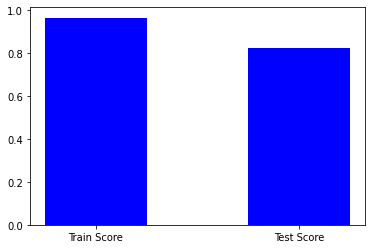

In [ ]:
# Light GBM com validação cruzada

# importando a função de grid search do sklearn
from sklearn.model_selection import GridSearchCV

# definindo os valores possíveis dos parâmetros a serem testados
params = {}

# criando o objeto do modelo com XGBClassifier
lgb_model_cv = lgb.LGBMRegressor(random_state = seed)

# criando o objeto do grid search com GridSearchCV
grid_search = GridSearchCV(lgb_model_cv, param_grid=params, return_train_score=True) #default value for splitting is 3

# treinando o modelo com o grid search
grid_search.fit(X_training, y_training)

# pegando os resultados da validação cruzada (cv_results)
cv_results = pd.DataFrame(grid_search.cv_results_)

# imprimindo o score médio nas bases de treino
print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))

# imprimindo o score médio nas bases de validação
print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_test_score.values[0]))

y = [cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0], 
     cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0]]
x = ["Train Score", "Test Score"]
width = 1/2
plt.bar(x, y, width, color="blue")  

Mais uma vez, pudemos ver um crescimento no R² de validação ao utilizar a validação cruzada, assim como verificamos com o *random forest*.

Agora vamos utilizar o *grid search* com o *Light GBM*, de forma muito parecida com o que fizemos para o *random forest*.

Atenção: isso pode levar algum tempo.

In [ ]:
# Light GBM com validação cruzada e Grid Search

# definindo os valores possíveis dos parâmetros a serem testados
params = {'max_depth': [2, 5, 10, 50],
          'learning_rate': [0.01, 0.03, 0.1, 0.5],
          'num_iterations': [50, 100, 200, 500],
          'min_data_in_leaf': [5, 20, 50],
          'min_gain_to_split': [0., 0.5, 1, 5]}

# criando o objeto do modelo com XGBClassifier
lgb_model_cv_gs = lgb.LGBMRegressor(random_state = seed)

# criando o objeto do grid search com GridSearchCV
grid_search = GridSearchCV(lgb_model_cv_gs, param_grid=params, return_train_score=True) #default value for splitting is 3

# treinando o modelo com o grid search
grid_search.fit(X_training, y_training)

# # imprimindo a melhor combinação de hiperparâmetros
print('\n Best hyperparameters:')
print(grid_search.best_params_)

# pegando os resultados da validação cruzada (cv_results)
cv_results = pd.DataFrame(grid_search.cv_results_)

# imprimindo o score médio nas bases de treino
print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))

# imprimindo o score médio nas bases de validação
print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_test_score.values[0]))

# configurando o modelo com a melhor combinação de hiperparâmetros
lgb_model_cv_gs.set_params(max_depth = grid_search.best_params_['max_depth'],
                           learning_rate = grid_search.best_params_['learning_rate'],
                           min_data_in_leaf = grid_search.best_params_['min_data_in_leaf'],
                           min_gain_to_split = grid_search.best_params_['min_gain_to_split'])

# treinando um modelo com a melhor combinação de hiperparâmetros
lgb_model_cv_gs.fit(X_training, y_training)

# desenhando o gráfico de impoartância de variáveis
features = estate_df['feature_names']
importances = lgb_model_cv_gs.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

NameError: ignored

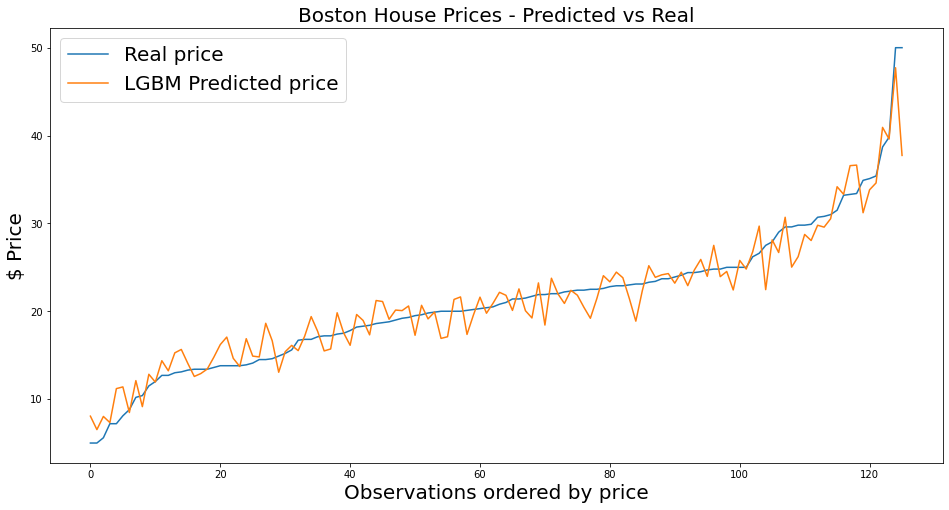

In [ ]:
# Desenhando o gráfico de valores previstos por valores reais
y_pred = lgb_model_cv_gs.predict(X_val)
plt.figure(figsize=(16,8))
plt.title('Boston House Prices - Predicted vs Real',fontsize=20)
df = pd.DataFrame({'real':y_val,'LGBM':lgb_model_cv_gs.predict(X_val)})
df.sort_values(by=['real'],ascending=True,inplace=True)
df = df.reset_index(drop=True)
plt.plot(df)
plt.legend(['Real price','LGBM Predicted price'],fontsize=20)
plt.ylabel('$ Price',fontsize=20)
plt.xlabel('Observations ordered by price',fontsize=20)
plt.show()

O *grid search* selecionou o ```max_depth``` de 2, o ```min_data_in_leaf``` de 5 e o número de iterações de 500 na melhor iteração. O R² de validação aumentou para 0,871, melhor do que nas nossas tentativas anteriores!

Dessa vez, as variáveis mais importantes foram **LSTAT** and **DIS**, que são o percentual de baixa renda na população e a distância média da casa para o centros empresariais de Boston. E dessa vez, isso faz sentido?

### 5.3. Redes Neurais

#### 5.3.1. Teoria
Diferentemente dos métodos anteriores, as redes neurais são inspiradas por estruturas biológicas. Como o próprio nome diz, esse método tenta criar uma rede de neurônios. Nosso cérebro é talvez a máquina mais poderosa que existe e contém uma rede muito grande de neurônios interconectados para que seja capaz de processar informações. Em resumo, a principal função dos neurônios é coletar as entradas de outros neurônios pelos dendritos. Cada neurônio soma todas suas entredas e, se o resultado for maior que um limiar, ele ativa. Essa ativação então libera um sinal pro próximo neurônio.

Legal, não?! Mas como será que isso funciona como uma técnica de _Machine Learning_?

Bom que você perguntou... rs. Em uma rede neural, o neurônio nada mais é do que um nome chique pra uma função. Então, ele basicamente recebe um conjunto de entrada, aplica alguma lógica, e dá o resultado na saída.

E, assim, uma rede neural é uma rede de funções! Uma rede neural simples se parece com essa a seguir:

![Imgur](https://upload.wikimedia.org/wikipedia/commons/1/1d/Neural_network_example.png)

Como dá para ver na imagem acima, a rede neural é construída com 3 tipos de camadas:
1. Camada de entrada (input layer): recebe os dados iniciais da rede neural
2. Camadas escondidas (hidden leayers): camadas intermediárias entre as entradas e as saídas onde todo cálculo é feito
3. Camada de saída (output layer): produz os resultados para as entradas dadas

Cada nó é conectado com todos os nós da camada seguinte e cada conexão (setas pretas) tem um peso associado. Esse peso pode ser entendido como o impacto que aquele nó tem no nó da próxima camada.

Essa é uma breve introdução da ideia da rede neural. Para melhor entendimento do funcionamento das redes, sugerimos as fontes a seguir:
1. [Neural Networks Explained](https://www.youtube.com/watch?v=GvQwE2OhL8I&feature=youtu.be): vídeo de 12 minutos, mas que dá uma boa explicação sobre os conceitos básicos.
2. [But what *is* a Neural Network?](https://www.youtube.com/watch?v=aircAruvnKk&feature=youtu.be): vídeo de 20 minutos, mas dá uma explicação boa e intuitiva, usando o problema de reconhecimento de números.
3. [Artigo do Medium](https://medium.com/technologymadeeasy/for-dummies-the-introduction-to-neural-networks-we-all-need-c50f6012d5eb)
4. [Using neural networks to recognized handwritting digits](http://neuralnetworksanddeeplearning.com/chap1.html)
5. [Ferramenta de redes neurais](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4&seed=0.66497&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
6. [Artigo do Towards data science](https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a)

#### 5.3.2. Código em Python e Avaliação

Para construir um regressor usando uma rede neural, a primeira coisa que temos que fazer é importar ```MLPRegressor```da biblioteca ```sklearn```.

In [ ]:
from sklearn.neural_network import MLPRegressor

Antes de fazermos de fato a nossa primeira rede neural, vamos ver quais são os principais atributos que temos para configurá-la.
- <i>hidden_layer_sizes</i>: uma tupla, no qual o nº elemento representa o número de neurônios na nª camada escondida
- <i>activation</i>: representa a função de ativação utilizada na camada escondida. Pode ser 'identity', 'logistic', 'tanh' ou 'relu'.
- <i>solver</i>: o algoritmo de solução para a otimização dos pesos. Para _datasets_ pequenos 'lbfgs' converge mais rapidamente e tem bons resultados, enquanto 'adam' funciona melhor em dados relativamente grandes

Se quiser entender melhor os demais hiperparâmetros, veja nesse [link](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

Dado que as redes neurais exploram as relações matemáticas entre as variáveis, a qualidade do nosso modelo pode ser afetada pelo fato das _features_ terem ordens de magnitudes diferentes. Imagine, por exemplo, um modelo que faz a soma de duas variáveis em uma camada: se uma delas for em média muito maior que a outra, ela automaticamente terá um peso maior no processo.

Por isso, é importante normalizar as variáveis com um _scaler_:

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

Score on training set: 0.742
Score on validation set: 0.573
Explained variance score: 0.574
Mean absolute error (MAE): 3.687
Mean squared error (MSE): 26.270
Mean squared log error (MSLE): 0.064
R² Score: 0.573


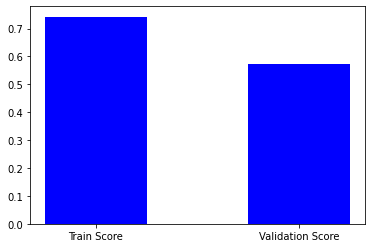

In [ ]:
# criando o objeto do modelo com MLPRegressor
neural_network_model = MLPRegressor(activation='tanh', 
                                    solver = 'lbfgs',
                                    hidden_layer_sizes=(2),
                                    early_stopping = True)

# treinando o modelo com os dados de treino
neural_network_model.fit(X_train_scaled, y_train)

# prever com o modelo nos dados de validacao
y_pred = neural_network_model.predict(X_val_scaled)

# calculando e imprimindo algumas métricas
print("Score on training set: {:.3f}".format(neural_network_model.score(X_train_scaled, y_train)))
print("Score on validation set: {:.3f}".format(neural_network_model.score(X_val_scaled, y_val)))
y = [neural_network_model.score(X_train_scaled, y_train), 
     neural_network_model.score(X_val_scaled, y_val)]
x = ["Train Score", "Validation Score"]
width = 1/2
plt.bar(x, y, width, color="blue") 
print("Explained variance score: {:.3f}".format(explained_variance_score(y_val, y_pred)))
print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_val, y_pred)))
print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_val, y_pred)))
print("Mean squared log error (MSLE): {:.3f}".format(mean_squared_log_error(y_val, [x if x >= 0 else 0 for x in y_pred]))) # tratando valores negativos que podem ser previstos pela rede neural
print("R² Score: {:.3f}".format(r2_score(y_val, y_pred)))

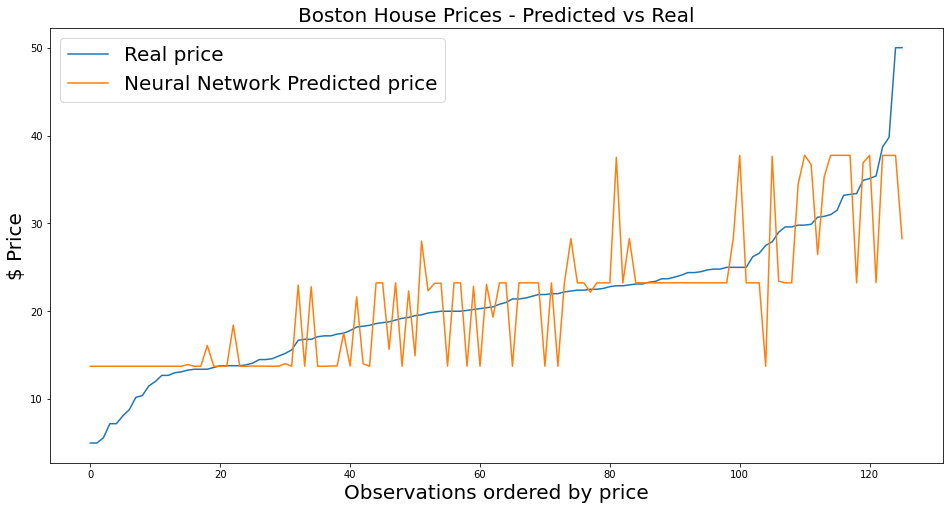

In [ ]:
# Desenhando o gráfico de valores previstos por valores reais
y_pred = neural_network_model.predict(X_val_scaled)
plt.figure(figsize=(16,8))
plt.title('Boston House Prices - Predicted vs Real',fontsize=20)
df = pd.DataFrame({'real':y_val,'NN':neural_network_model.predict(X_val_scaled)})
df.sort_values(by=['real'],ascending=True,inplace=True)
df = df.reset_index(drop=True)
plt.plot(df)
plt.legend(['Real price','Neural Network Predicted price'],fontsize=20)
plt.ylabel('$ Price',fontsize=20)
plt.xlabel('Observations ordered by price',fontsize=20)
plt.show()

Você pode tentar mudar o número de neurônios em cada camada e ver como isso altera o resultado.

Não entraremos muito nos demais detalhes da teoria e da otimização das redes neurais.

### 5.4 Comparação entre os modelos

Por fim, vamos desenhar todos os resultados no mesmo gráfico para tentarmos verificar qual modelo se adequa melhor aos dados reais.

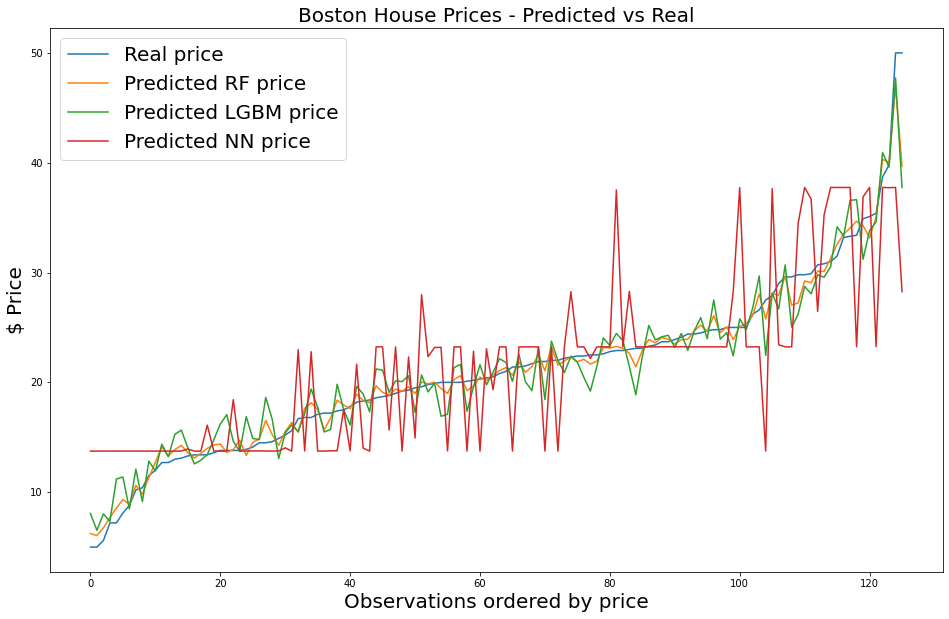

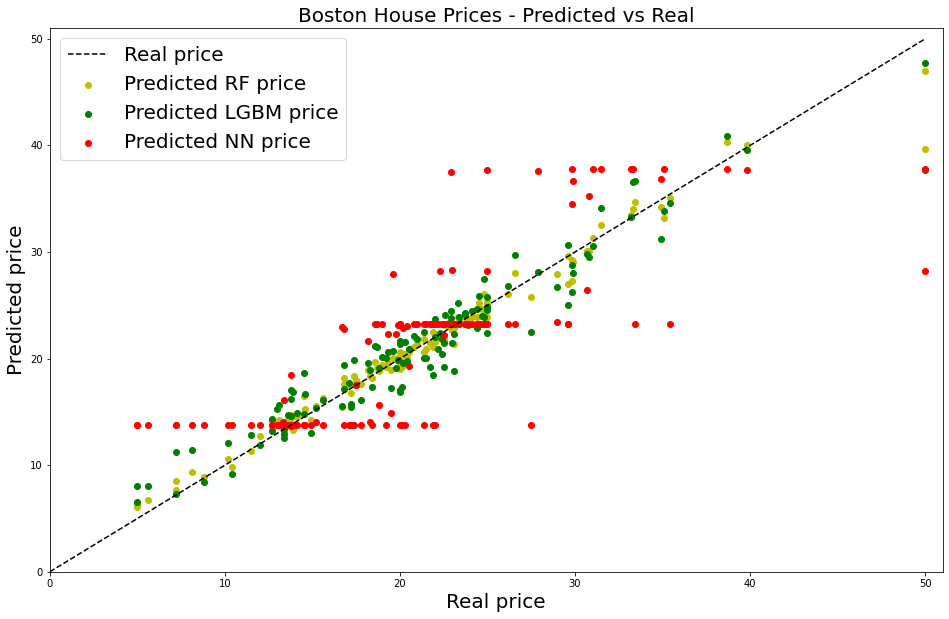

In [ ]:
# Desenhando o gráfico de valores previstos por valores reais para ambos os modelos
plt.figure(figsize=(16,10))
plt.title('Boston House Prices - Predicted vs Real',fontsize=20)
df = pd.DataFrame({'real':y_val,'Random Forest':rf_model_cv_gs.predict(X_val),'LGBM':lgb_model_cv_gs.predict(X_val),'NN':neural_network_model.predict(X_val_scaled)})
df.sort_values(by=['real'],ascending=True,inplace=True)
df = df.reset_index(drop=True)
plt.plot(df)
plt.legend(['Real price','Predicted RF price','Predicted LGBM price','Predicted NN price'],fontsize=20)
plt.ylabel('$ Price',fontsize=20)
plt.xlabel('Observations ordered by price',fontsize=20)
plt.show()

plt.figure(figsize=(16,10))
plt.title('Boston House Prices - Predicted vs Real',fontsize=20)
plt.scatter(x=df['real'],y=df['Random Forest'],c='y')
plt.scatter(x=df['real'],y=df['LGBM'],c='g')
plt.scatter(x=df['real'],y=df['NN'],c='r')
plt.plot([0,50],[0,50],'k--')
plt.axis([0,51,0,51])
plt.legend(['Real price','Predicted RF price','Predicted LGBM price','Predicted NN price'],fontsize=20)
plt.xlabel('Real price',fontsize=20)
plt.ylabel('Predicted price',fontsize=20)
plt.show()

Pelos gráficos, parece que o nosso modelo mais simples (o *random forest*) se adequou melhor. Isso pode ocorrer devido ao fato da nossa base dedados ser relativamente pequena. Em geral, modelos mais complexos como os de *boosting* ou as redes neurais precisam de mais dados para não apresentarem *over-fitting*.

O segundo gráfico nos dá outra visão da acurácia dos modelos. O *random forest* é visivelmente mais próximo da linha que representa os valores reais, o que significa que ele é melhor.

<a id="digdeeper"></a>
## 6. Saiba mais

* [Selecting the best ML algorithm for your regression problem](https://towardsdatascience.com/selecting-the-best-machine-learning-algorithm-for-your-regression-problem-20c330bad4ef)
* [Regression vs Classification](https://medium.com/quick-code/regression-versus-classification-machine-learning-whats-the-difference-345c56dd15f7)
* [XGBoost Algorithm: Long May She Reign!](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)